In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
%matplotlib inline
import seaborn as sns
import xarray as xr
import pathlib

**Load dataset**
```This dataset includes the plant senenscence data from July to september)```


In [2]:
df_sen = pd.read_csv('soilfingerprints.csv', index_col = 0)
display(df_sen.head(3))

,Sen_7-29-21,Sen_8-4-21,Sen_8-11-21,Sen_8-18-21,Sen_8-25-21,Sen_9-1-21,Sen_9-8-21,Sen_9-23-21
Field_ID,,,,,,,,
1,10,8,10,15,10,15,30,40
2,20,25,20,30,30,40,40,50
4,5,10,15,15,8,15,35,70


* Rename the columns

In [3]:
df_sen.columns = df_sen.columns.str.split("_").str[-1]
df_sen.head(4)

,7-29-21,8-4-21,8-11-21,8-18-21,8-25-21,9-1-21,9-8-21,9-23-21
Field_ID,,,,,,,,
1,10,8,10,15,10,15,30,40
2,20,25,20,30,30,40,40,50
4,5,10,15,15,8,15,35,70
5,0,0,0,0,0,0,2,5


* Dataset with labels

In [4]:
df_label = pd.read_csv('label_soilfingerprints.csv', index_col =0)
df_label.head(3)

,Label,Location,Pair,FieldID,lat,long
Field_ID,,,,,,
1,1-0-1-2,Columbia Basin,1,1201,46.283706,-118.674581
2,0-0-1-2,Columbia Basin,1,1209,46.281286,-118.684761
4,1-0-2-1,Columbia Basin,2,106,47.084598,-119.808285


* change senescence data to xarray

In [5]:
sen_xarray = xr.Dataset(
{"senescence": (("Field_ID", "Date"), df_sen.values )},
coords = {
    "Field_ID": df_sen.index.values,
    "Date": df_sen.columns.values
})
sen_xarray

<xarray.Dataset>
Dimensions:     (Date: 8, Field_ID: 22)
Coordinates:
  * Field_ID    (Field_ID) int64 1 2 4 5 6 7 8 9 10 ... 16 17 18 19 20 21 22 23
  * Date        (Date) object '7-29-21' '8-4-21' ... '9-8-21' '9-23-21'
Data variables:
    senescence  (Field_ID, Date) int64 10 8 10 15 10 15 30 ... 8 15 10 15 30 35

In [6]:
df_label.index.difference(df_sen.index.values)

Int64Index([], dtype='int64', name='Field_ID')

* Change label dataset to xarray

In [7]:
label_array = df_label.to_xarray()
label_array

<xarray.Dataset>
Dimensions:   (Field_ID: 22)
Coordinates:
  * Field_ID  (Field_ID) int64 1 2 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23
Data variables:
    Label     (Field_ID) object '1-0-1-2' '0-0-1-2' ... '0-1-11-4' '1-1-11-4'
    Location  (Field_ID) object 'Columbia Basin' ... 'Skagit Valley'
    Pair      (Field_ID) int64 1 1 2 2 3 3 4 4 5 6 7 8 5 6 7 8 9 9 10 10 11 11
    FieldID   (Field_ID) object '1201' '1209' ... 'Hedlin - nonvirgin'
    lat       (Field_ID) float64 46.28 46.28 47.08 47.08 ... 48.4 48.39 48.38
    long      (Field_ID) float64 -118.7 -118.7 -119.8 ... -122.4 -122.5 -122.5

* Combine two xarrays

In [8]:
soil_xarray = label_array.merge(sen_xarray)
soil_xarray

<xarray.Dataset>
Dimensions:     (Date: 8, Field_ID: 22)
Coordinates:
  * Field_ID    (Field_ID) int64 1 2 4 5 6 7 8 9 10 ... 16 17 18 19 20 21 22 23
  * Date        (Date) object '7-29-21' '8-4-21' ... '9-8-21' '9-23-21'
Data variables:
    Label       (Field_ID) object '1-0-1-2' '0-0-1-2' ... '0-1-11-4' '1-1-11-4'
    Location    (Field_ID) object 'Columbia Basin' ... 'Skagit Valley'
    Pair        (Field_ID) int64 1 1 2 2 3 3 4 4 5 6 7 8 5 6 7 8 9 9 10 10 11 11
    FieldID     (Field_ID) object '1201' '1209' ... 'Hedlin - nonvirgin'
    lat         (Field_ID) float64 46.28 46.28 47.08 47.08 ... 48.4 48.39 48.38
    long        (Field_ID) float64 -118.7 -118.7 -119.8 ... -122.4 -122.5 -122.5
    senescence  (Field_ID, Date) int64 10 8 10 15 10 15 30 ... 8 15 10 15 30 35

In [9]:
locations = soil_xarray.groupby('Location').groups
locations

{'Columbia Basin': [0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15],
 'Skagit Valley': [6, 7, 16, 17, 18, 19, 20, 21]}

In [10]:
locations.keys()

dict_keys(['Columbia Basin', 'Skagit Valley'])

In [11]:
soil_xarray.isel(Field_ID= locations['Columbia Basin'])

<xarray.Dataset>
Dimensions:     (Date: 8, Field_ID: 14)
Coordinates:
  * Field_ID    (Field_ID) int64 1 2 4 5 6 7 10 11 12 13 14 15 16 17
  * Date        (Date) object '7-29-21' '8-4-21' ... '9-8-21' '9-23-21'
Data variables:
    Label       (Field_ID) object '1-0-1-2' '0-0-1-2' ... '1-0-7-6' '1-0-8-3'
    Location    (Field_ID) object 'Columbia Basin' ... 'Columbia Basin'
    Pair        (Field_ID) int64 1 1 2 2 3 3 5 6 7 8 5 6 7 8
    FieldID     (Field_ID) object '1201' '1209' '106' ... '530' '541' '641'
    lat         (Field_ID) float64 46.28 46.28 47.08 47.08 ... 45.75 45.74 45.74
    long        (Field_ID) float64 -118.7 -118.7 -119.8 ... -119.2 -119.1 -119.1
    senescence  (Field_ID, Date) int64 10 8 10 15 10 15 30 40 ... 0 0 0 0 0 0 5

In [12]:
soil_xarray.isel(Field_ID= locations['Skagit Valley'])

<xarray.Dataset>
Dimensions:     (Date: 8, Field_ID: 8)
Coordinates:
  * Field_ID    (Field_ID) int64 8 9 18 19 20 21 22 23
  * Date        (Date) object '7-29-21' '8-4-21' ... '9-8-21' '9-23-21'
Data variables:
    Label       (Field_ID) object '0-1-4-2' '1-1-4-2' ... '0-1-11-4' '1-1-11-4'
    Location    (Field_ID) object 'Skagit Valley' ... 'Skagit Valley'
    Pair        (Field_ID) int64 4 4 9 9 10 10 11 11
    FieldID     (Field_ID) object 'Skagit virgin 1' ... 'Hedlin - nonvirgin'
    lat         (Field_ID) float64 48.44 48.43 48.21 48.33 ... 48.4 48.39 48.38
    long        (Field_ID) float64 -122.4 -122.4 -122.3 ... -122.4 -122.5 -122.5
    senescence  (Field_ID, Date) int64 10 10 10 15 8 15 30 ... 8 15 10 15 30 35

In [18]:
soil_xarray[['Location','senescence']]

<xarray.Dataset>
Dimensions:     (Date: 8, Field_ID: 22)
Coordinates:
  * Field_ID    (Field_ID) int64 1 2 4 5 6 7 8 9 10 ... 16 17 18 19 20 21 22 23
  * Date        (Date) object '7-29-21' '8-4-21' ... '9-8-21' '9-23-21'
Data variables:
    Location    (Field_ID) object 'Columbia Basin' ... 'Skagit Valley'
    senescence  (Field_ID, Date) int64 10 8 10 15 10 15 30 ... 8 15 10 15 30 35

In [14]:
soil_xarray.groupby('Location').mean('Date').to_dataframe()

,Pair,lat,long,senescence
Field_ID,,,,
1,1.0,46.283706,-118.674581,17.250
2,1.0,46.281286,-118.684761,31.875
4,2.0,47.084598,-119.808285,21.625
5,2.0,47.076717,-119.802953,0.875
6,3.0,47.045431,-119.609527,3.750
7,3.0,47.039913,-119.604025,6.250
8,4.0,48.438200,-122.422500,16.625
9,4.0,48.432600,-122.379100,31.000
10,5.0,45.697249,-119.354718,28.125


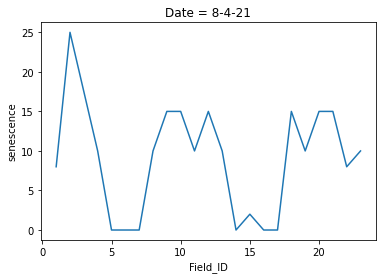

In [15]:
soil_xarray.senescence.isel(Date = 1).plot.line()

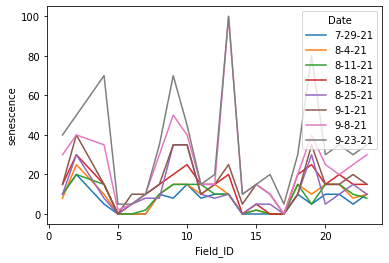

In [16]:
soil_xarray.senescence.plot(hue = 'Date')

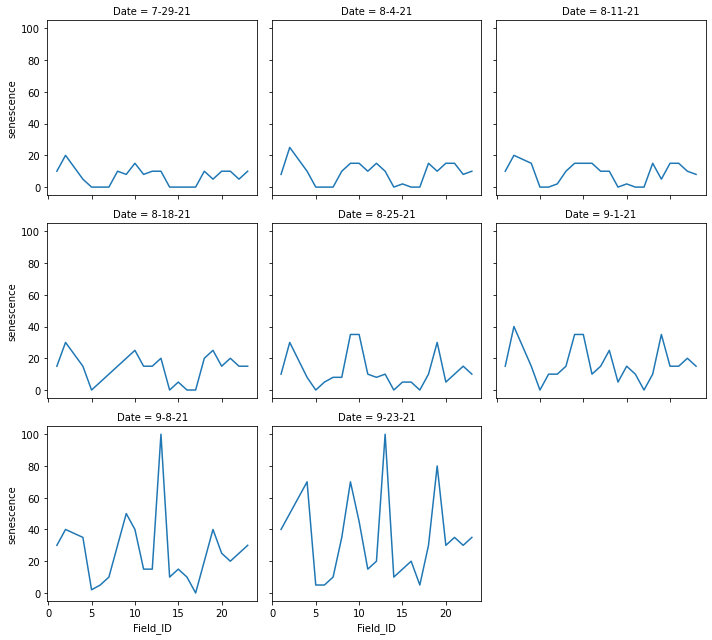

In [17]:
soil_xarray.senescence.plot(col = 'Date', col_wrap= 3)

In [45]:
data = soil_xarray[['Location','senescence']]
data

<xarray.Dataset>
Dimensions:     (Date: 8, Field_ID: 22)
Coordinates:
  * Field_ID    (Field_ID) int64 1 2 4 5 6 7 8 9 10 ... 16 17 18 19 20 21 22 23
  * Date        (Date) object '7-29-21' '8-4-21' ... '9-8-21' '9-23-21'
Data variables:
    Location    (Field_ID) object 'Columbia Basin' ... 'Skagit Valley'
    senescence  (Field_ID, Date) int64 10 8 10 15 10 15 30 ... 8 15 10 15 30 35

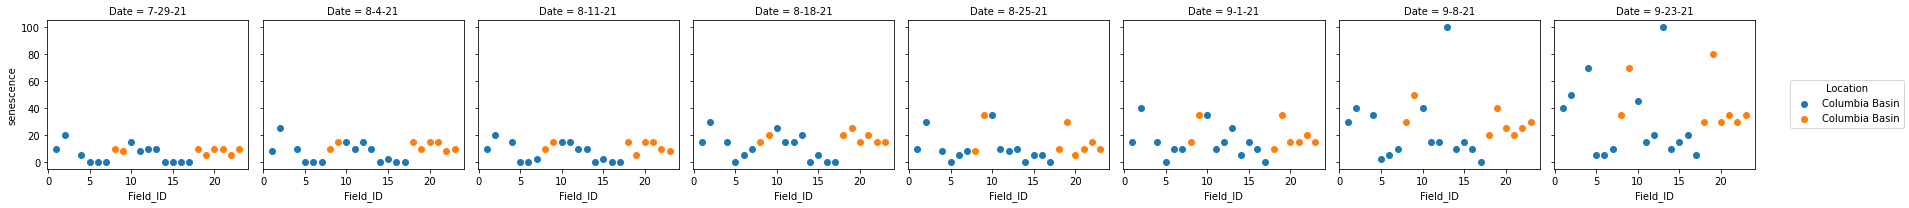

In [49]:
data.plot.scatter(x = 'Field_ID', y = 'senescence', hue = 'Location', col = 'Date')